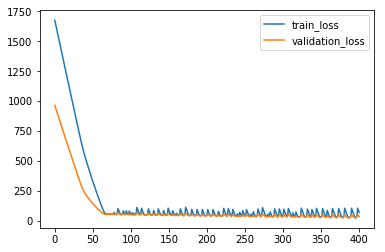

In [5]:
# %load australian.py
#本代码用于完成机器学习实验一中SVM线性分类的操作
#by 王松盛
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import random
#先读取数据集
def readData():
    x,y = load_svmlight_file('./dataset/australian.txt',14)
    x = x.toarray()
    return x,y
#切分数据集
def splitData(x,y):
    n_sample = len(y)
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)
    return X_train,y_train,X_test,y_test
#初始化模型:0初始化
def getInitData():
    random.seed(500)
    w = np.array([0.0]*14)
    b = random.random() * 10
    for i in range(14):
        w[i] = random.random() * 10
    return w,b
#输出线性分类的结果
def linearClassifier(x,w,b):
    #print ('w',w,'x',x,'b',b)
    #input()
    val = (w*x).sum()+b
    if val > 0:
        return 1,val
    else:
        return -1,val
#输出w和b梯度
def GetGradient(x,y,w,b,c):
    wGrad = np.array([0.0] * len(w))
    bGrad = 0.0
    for i in range(len(x)):
        temp = 1-y[i] *((w * x[i]).sum() + b)
        if temp >= 0:
            wGrad += w - c * y[i] * x[i]
            bGrad -= c * y.sum()
        else:
            wGrad += w
    wGrad /= len(x)
    bGrad /= len(x)
    return wGrad,bGrad
def GetGradient1(x,y,w,b,c):
    wGradient = [0.0] * 14
    for i in range(len(w)):
        temp_w = np.copy(w)
        temp_w[i] += 0.0001
        wGradient[i] = (loss(x,y,temp_w,b,c) - loss(x,y,w,b,c)) / 0.0001
    bGradient = (loss(x,y,w,b+0.0001,c) - loss(x,y,w,b,c))/0.0001
    wGradient = np.array(wGradient)
    return wGradient,bGradient
#梯度下降算法
def GradientDescent(x,y,w,b,c,steplen,n_iteration):
    w_Group = [w]
    b_Group = [b]
    for i in range(n_iteration):
        w = np.copy(w)
        wGrad,bGrad = GetGradient(x,y,w,b,c)
        w -= wGrad * steplen
        b -= b*steplen
        w_Group.append(w)
        b_Group.append(b)
    return w_Group,b_Group
#计算数据集的square loss
def loss(x,y,w,b,c):
    sumWr = 0
    for i in range(len(x)):
        temp = 1 - y[i] * ((w * x[i]).sum() + b)
        if temp <= 0:
            continue
        else:
            sumWr += temp
    return ((w*w).sum()*0.5 + c* sumWr) / len(x)
def Precision(x,y,w,b):
    right = 0
    for i in range(len(x)):
        ans = linearClassifier(x[i],w,b)[0]
        if ans == y[i]:
            right += 1
    return float(right) / len(x)
#主程序
def main(c,iteration):
    x,y = readData()
    train_x,train_y,test_x,test_y = splitData(x,y)
    w,b = getInitData()
    w_group,b_Group = GradientDescent(train_x,train_y,w,b,c,0.001,iteration)
    train_dif_Group = []
    test_dif_Group = []
    for i in range(len(w_group)):
        #print ('w',w_group[i])
        #print ('b',b_Group[i])
        train_dif_Group.append(loss(train_x,train_y,w_group[i],b_Group[i],c))
        test_dif_Group.append(loss(test_x,test_y,w_group[i],b_Group[i],c))
        #print (train_dif_Group[-1])
        #print (test_dif_Group[-1])
    #print (train_dif_Group)
    #print (test_dif_Group)
    plt.plot([i for i in range(iteration+1)],train_dif_Group,label = 'train_loss')
    plt.plot([i for i in range(iteration+1)], test_dif_Group, label='validation_loss')
    plt.legend()
    plt.show()
main(0.958,400)